In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from imageio import imread
import PIL
from skimage.transform import resize
from skimage import color
from matplotlib import pyplot as plt
# Any results you write to the current directory are saved as output.
from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization,Flatten,Dense,Dropout,MaxPool2D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

['flowers']


Using TensorFlow backend.


In [2]:
dirList=os.listdir('../input/flowers/flowers/')
imageData=[]
imageLabel=[]
validExtensionsList=['jpg','tif','png','bmp']
for d in dirList:
    print('Processing...',d)
    for f in os.listdir('../input/flowers/flowers/'+d):
        ext=f.split('.')[-1]
        if ext in validExtensionsList:
            data=imread('../input/flowers/flowers/'+d+'/'+f)
            #color.rgb2gray(imread('../input/flowers/flowers/'+d+'/'+f))
            resized_data=resize(data,(100,100))
            imageData.append(resized_data)
            imageLabel.append(d)
        else:
            pass
print('DONE!')

Processing... rose
Processing... dandelion
Processing... daisy
Processing... sunflower
Processing... tulip
DONE!


In [3]:
np.shape(imageData),np.shape(imageLabel)

((4323, 100, 100, 3), (4323,))

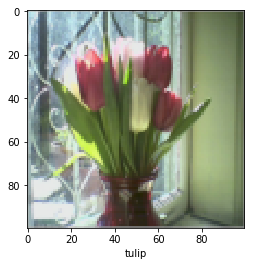

In [4]:
idx=np.random.randint(len(imageData))
plt.imshow(imageData[idx])
plt.xlabel(imageLabel[idx])
plt.show()

In [5]:
X=np.array(imageData)
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],3)
y=np.array(imageLabel)
num_classes=len(set(y))
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(num_classes=num_classes,y=y)
input_shape=(X.shape[1],X.shape[2],X.shape[3])

In [6]:
np.shape(X),np.shape(y)

((4323, 100, 100, 3), (4323, 5))

In [7]:
def createCNNModel():
    model=Sequential()
    model.add(Convolution2D(64,3,input_shape=input_shape,activation='relu'))
    model.add(Convolution2D(64,3,input_shape=input_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.20))
    model.add(Convolution2D(128,3,input_shape=input_shape,activation='relu'))
    model.add(Convolution2D(128,3,input_shape=input_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.20))
    model.add(Convolution2D(256,3,input_shape=input_shape,activation='relu'))
    model.add(Convolution2D(256,3,input_shape=input_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.20))
    model.add(Convolution2D(512,3,input_shape=input_shape,activation='relu'))
    model.add(Convolution2D(512,3,input_shape=input_shape,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.20))
    model.add(Flatten())
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(num_classes,activation='softmax'))
    return model

In [8]:
model=createCNNModel()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test),np.shape(X_val),np.shape(y_val)

((2766, 100, 100, 3),
 (2766, 5),
 (865, 100, 100, 3),
 (865, 5),
 (692, 100, 100, 3),
 (692, 5))

In [11]:
epochs=100
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
#model.fit_generator(datagen.flow(X_train, y_train),validation_data=(X_val,y_val),steps_per_epoch=len(X_train) / 10, epochs=epochs,verbose=1)
hist=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=50,epochs=epochs,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 2766 samples, validate on 692 samples
Epoch 1/100
2766/2766 [==============================] - 8s 3ms/step - loss: 1.8936 - acc: 0.3829 - val_loss: 2.5836 - val_acc: 0.3699
Epoch 2/100
2766/2766 [==============================] - 4s 1ms/step - loss: 1.2845 - acc: 0.4902 - val_loss: 1.6144 - val_acc: 0.3584
Epoch 3/100
2766/2766 [==============================] - 4s 1ms/step - loss: 1.1287 - acc: 0.5546 - val_loss: 1.3373 - val_acc: 0.4350
Epoch 4/100
2766/2766 [==============================] - 4s 1ms/step - loss: 1.0100 - acc: 0.6041 - val_loss: 1.3585 - val_acc: 0.4812
Epoch 5/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.9779 - acc: 0.6189 - val_loss: 1.2062 - val_acc: 0.4986
Epoch 6/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.9106 - acc: 0.6529 - val_loss: 2.0647 - val_acc: 0.4032
Epoch 7/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.8807 - acc: 0.66

2766/2766 [==============================] - 4s 1ms/step - loss: 0.0482 - acc: 0.9834 - val_loss: 1.6566 - val_acc: 0.6850
Epoch 60/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0480 - acc: 0.9830 - val_loss: 1.7840 - val_acc: 0.7009
Epoch 61/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0552 - acc: 0.9845 - val_loss: 2.3459 - val_acc: 0.6806
Epoch 62/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0767 - acc: 0.9783 - val_loss: 1.7476 - val_acc: 0.6647
Epoch 63/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0677 - acc: 0.9798 - val_loss: 1.7511 - val_acc: 0.6806
Epoch 64/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0718 - acc: 0.9779 - val_loss: 1.6058 - val_acc: 0.7283
Epoch 65/100
2766/2766 [==============================] - 4s 1ms/step - loss: 0.0406 - acc: 0.9845 - val_loss: 1.6468 - val_acc: 0.7110
Epoch 66/100
2766/2766 [==============================] - 4s 

In [12]:
model.evaluate(X_test,y_test)

865/865 [==============================] - 1s 642us/step


[2.4118627737023237, 0.661271676300578]

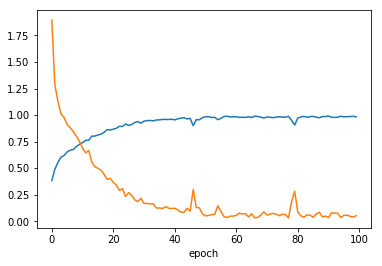

In [13]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.plot(range(len(hist.history['loss'])),hist.history['loss'])
plt.xlabel('epoch')
plt.show()